In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#### 파일 열기

In [49]:
# csv 파일

# df = pd.read_csv('drive/Othercomputers/내 컴퓨터/hmkd1/m3_통계수학/data/ch2_scores_em.csv',
#                  index_col='student number')
df = pd.read_csv('../data/ch2_scores_em.csv', index_col=0)    # index_col='student number'
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [32]:
# 평균값
print(df.mathematics.describe())

print(df.mathematics.describe()['mean'])
print(df.mathematics.describe().loc['mean'])    # Series여서 loc 없어도 됨
print(df.mathematics.describe()[1])
print(df.mathematics.describe().iloc[1])    # Series여서 loc 없어도 됨
print(df.mathematics.mean())
print(np.mean(df.mathematics))


count    50.000000
mean     78.880000
std       8.414371
min      57.000000
25%      76.000000
50%      80.000000
75%      84.000000
max      94.000000
Name: mathematics, dtype: float64
78.88
78.88
78.88
78.88
78.88
78.88


In [25]:
# 중앙값

print(df.mathematics.describe()[5])
print(df.mathematics.describe()['50%'])
print(df.mathematics.median())
np.median(df.mathematics)

80.0
80.0
80.0


80.0

In [67]:
# 최빈값

print(df.mathematics.mode())    # 최빈값이 1개 이상일 수 있기에, Series로 반환됨
print(df.mathematics.mode().values)
print(df.mathematics.value_counts()[0:3])
df.mathematics.value_counts().index[0:3]


0    77
1    82
2    84
Name: mathematics, dtype: int64
[77 82 84]
84    4
82    4
77    4
Name: mathematics, dtype: int64


Int64Index([84, 82, 77], dtype='int64')

In [238]:
# 편차 (deviation)
# np.subtract - 배열이나 리스트 요소 간의 차이를 계산함

deviation = ((df.mathematics - df.mathematics.mean()))
np.subtract(df.mathematics, df.mathematics.mean())[:3]

student number
1   -13.88
2     1.12
3   -15.88
Name: mathematics, dtype: float64

In [158]:
# 길이 아는 법
# shape - 배열의 구조를 튜플 형태로 나타냄
# size - 배열의 총 요소수를 나타냄 (2차원 배열도 다 풀어서 개수함)

print(df.mathematics.describe()[0])
print(df.mathematics.describe()['count'])
print(df.mathematics.shape)
print(df.mathematics.shape[0])
df.mathematics.size

50.0
50.0
(50,)
50


50

In [155]:
# 분산
# np.square - 주어진 배열의 각 원소를 제곱하는 함수

print(df.mathematics.describe()['std']**2)  # describe에서는 기본이 비편향 표준편차임 (ddof=1 적용된 것과 같음)
print(np.std(df.mathematics, ddof=1)**2)
print(np.var(df.mathematics, ddof=1))
print(df.mathematics.var())     # default가 ddof=1임
print(sum((df.mathematics-df.mathematics.mean())**2)/(len(df.mathematics)-1))
print(sum((df.mathematics-df.mathematics.mean())**2)/(df.mathematics.shape[0]-1))
sum(np.square(df.mathematics-df.mathematics.mean()))/(len(df.mathematics)-1)

70.80163265306125
70.80163265306125
70.80163265306123
70.80163265306123
70.80163265306118
70.80163265306118


70.80163265306118

In [178]:
# 표준편차

print(df.mathematics.describe()['std'])  # describe에서는 기본이 비편향 표준편차임 (ddof=1 적용된 것과 같음)
print(df.mathematics.describe()[2])
print(np.std(df.mathematics, ddof=1))
print(df.mathematics.std())

print(np.sqrt(df.mathematics.var()))
print(np.sqrt(np.var(df.mathematics, ddof=1)))
print(df.mathematics.var()**0.5)

print(np.sqrt(sum(np.square(df.mathematics-df.mathematics.mean()))/(len(df.mathematics)-1)))
print((sum(np.square(df.mathematics-df.mathematics.mean()))/(len(df.mathematics)-1))**0.5)

8.414370603500968
8.414370603500968
8.414370603500968
8.414370603500968
8.414370603500968
8.414370603500968
8.414370603500968
8.414370603500965
8.414370603500965


In [79]:
# 범위
# 데이터의 범위를 구하면 데이터가 어느 정도 분산되어 있는지를 알 수 있습니다.
# 범위가 크다는 것은 데이터가 크게 퍼져있는 것을 의미하고,
# 범위가 작다는 것은 데이터가 집중되어 있는 것을 의미합니다.
# 또한 범위는 이상치(outliers) 탐지에도 사용될 수 있습니다.
# 예를 들어, 데이터의 범위를 구한 후에 범위의 크기가 일정 수준 이상이면
# 이상치가 있을 가능성이 높다는 것을 의미합니다.
# 그렇다는 의미는 이상치의 영향으로 분포를 왜곡할 수 있음

df.mathematics.max() - df.mathematics.min()

37

In [209]:
# 정규화 - 데이터 간의 상대적인 크기 차이를 없앨 수 있음
# 평균 0 표준편차 1로 만들어야 하니까 - 평균을 빼주고, 표준편차로 나눠준다

data = df.english
mean = data.mean()
std = data.std()

z = (data - mean) / std
np.array(z)[:5]

array([-1.67146054,  1.08369419, -0.24286179, -1.77350331, -0.14081902])

In [263]:
# 열을 여러 형태로 뽑고 변환하는 법

df_s = df['english']    # Series로 반환
df_d = df[['english']]  # DataFrame으로 반환
df_a = np.array(df.english)

[42,
 69,
 56,
 41,
 57,
 48,
 65,
 49,
 65,
 58,
 70,
 47,
 51,
 64,
 62,
 70,
 71,
 68,
 73,
 37,
 65,
 65,
 61,
 52,
 57,
 57,
 75,
 61,
 47,
 54,
 66,
 54,
 54,
 42,
 37,
 79,
 56,
 62,
 62,
 55,
 63,
 57,
 57,
 67,
 55,
 45,
 66,
 55,
 64,
 66]

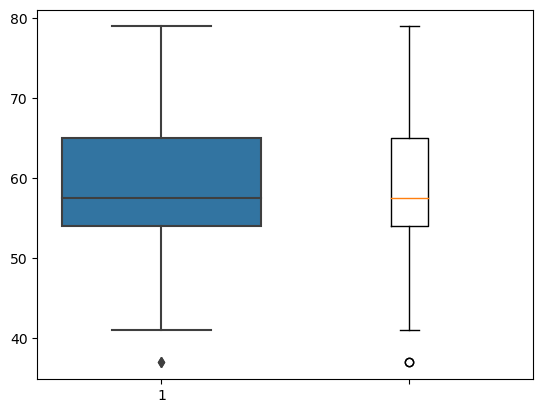

In [86]:
# 이상치 - 일반적인 데이터의 분포와 매우 다른 값을 가지는 데이터를 의미
# boxplot

df_e=df[['english']]
df_e

sns.boxplot(data=df_e)
plt.boxplot(df_e)

plt.show()

<AxesSubplot:>

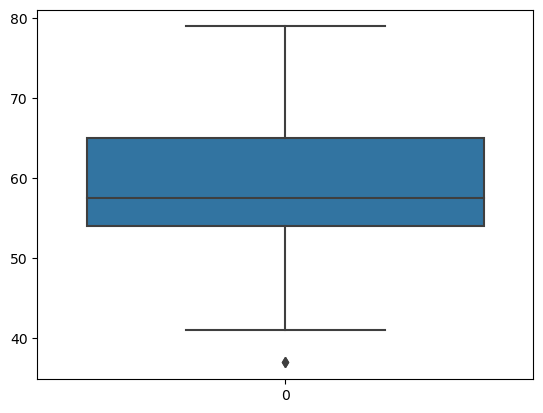

In [112]:
sns.boxplot(df.english.reset_index(drop=True))    # 인덱스에 0이 없어서(1부터 시작) reset해주어야 sns.boxplot 나옴


In [78]:
# IQR (Interquartile Range) 사분범위
# 데이터의 분포를 나타내는 통계량 중 하나로, 주어진 데이터의 하위 25%와 상위 25% 사이의 범위를 의미함
# 중앙값을 기준으로 데이터가 얼마나 퍼져 있는지를 측정하는 방법
# 범위에 비해 이상치의 영향 덜 받음
# 이상치 탐지하는데 사용
# IQR이 작으면 데이터다 Q1~Q3 사이에 밀집외더 있다는 의미
# np.percentile - 
# quantile - 
from scipy.stats import iqr

df_e = df.english

english_sorted = sorted(df['english'])
print(english_sorted[int(len(english_sorted) * 0.75)] - english_sorted[int(len(english_sorted) * 0.25)])

print(sorted(df.english)[int(len(english_sorted) * 0.75)] - sorted(df.english)[int(len(english_sorted) * 0.25)])

print(np.sort(df.english)[int(len(english_sorted) * 0.75)] - np.sort(df.english)[int(len(english_sorted) * 0.25)])

print(df_e.describe()['75%'] - df_e.describe()['25%'])

print(np.percentile(df_e, 75) - np.percentile(df_e, 25))
print(df_e.quantile(0.75) - df_e.quantile(0.25))

iqr(df_e)

11
11
11
11.0
11.0
11.0


11.0

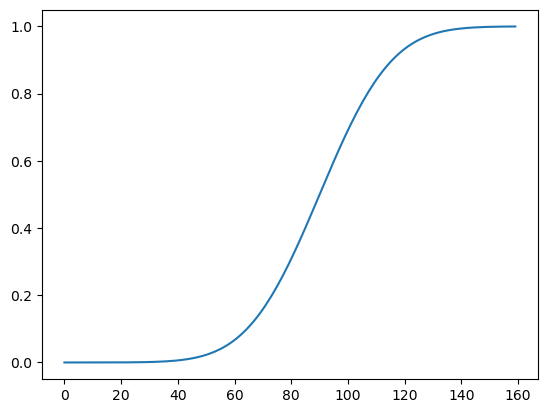

2